### TİTANİC KAGGLE UYGULAMSI


#### About data

 kütüphaneleri yükleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### veri setini yükleme

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### veri önişleme

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
columns_dict = {
    'PassengerId': 'Yolcu kimlik numarası. Her yolcu için benzersiz bir kimlik numarasıdır.',
    'Survived': 'Hayatta kalma durumu. 1, hayatta kalanları; 0, hayatını kaybedenleri temsil eder.',
    'Pclass': 'Bilet sınıfı. 1, 2 veya 3 olarak kodlanmıştır; 1 birinci sınıfı, 2 ikinci sınıfı ve 3 üçüncü sınıfı temsil eder.',
    'Name': 'Yolcunun adı.',
    'Sex': 'Cinsiyet. "male" erkekleri, "female" kadınları temsil eder.',
    'Age': 'Yolcunun yaşı. Bazı verilerde eksik değerler bulunabilir (non-null count: 714).',
    'SibSp': 'Yolcunun gemideki kardeş/eş sayısı.',
    'Parch': 'Yolcunun gemideki ebeveyn/çocuk sayısı.',
    'Ticket': 'Bilet numarası.',
    'Fare': 'Bilet ücreti.',
    'Cabin': 'Kabin numarası. Bazı verilerde eksik değerler bulunabilir (non-null count: 204).',
    'Embarked': 'Geminin hangi limandan kalktığı. "C" Cherbourg, "Q" Queenstown, "S" Southampton olarak kodlanmıştır. Bazı verilerde eksik değerler bulunabilir (non-null count: 889).'
}

In [6]:
columns_dict['SibSp']

'Yolcunun gemideki kardeş/eş sayısı.'

In [7]:
df = pd.concat([df_train, df_test])


In [8]:
df_train.shape

(891, 12)

In [9]:
df_test.shape

(418, 11)

In [10]:
df.shape

(1309, 12)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df_numeric = df.corr(numeric_only= True)
df_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<Axes: >

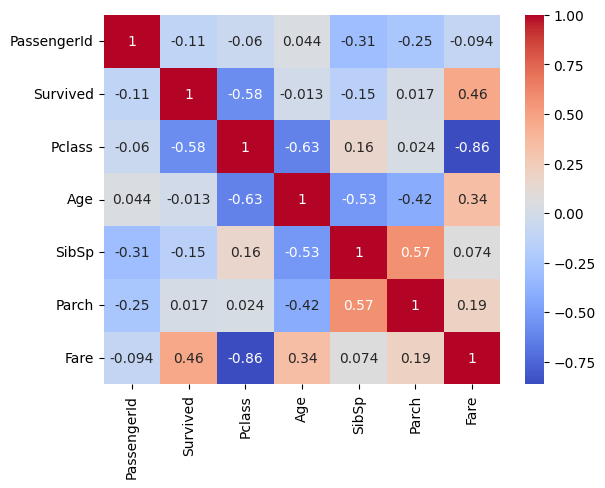

In [15]:
sns.heatmap(df_numeric.corr(), annot=True,  cmap='coolwarm' )

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [17]:
df.describe(include='all')
#sadece kategorik deperleri istiyosan df.describe(include='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


<Axes: >

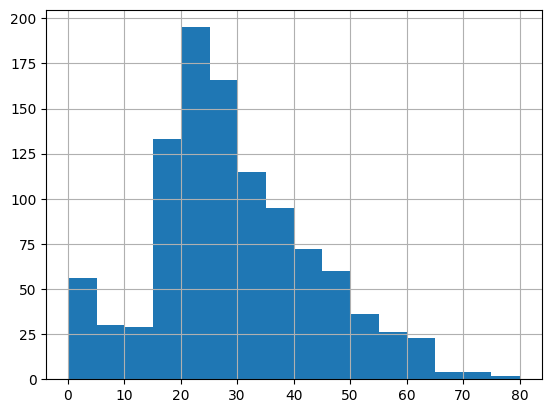

In [18]:
df['Age'].hist(bins=16)

<Axes: >

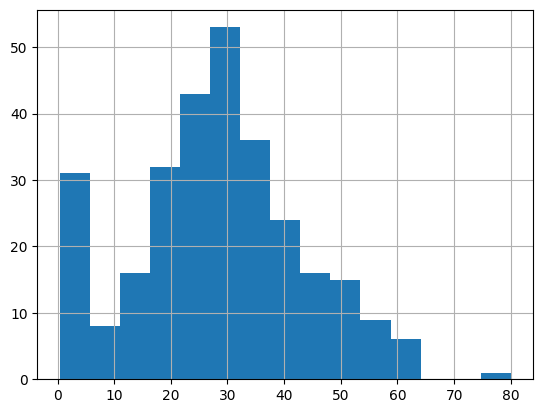

In [19]:
df[df['Survived']==1]['Age'].hist(bins=15,alpha=1)

In [20]:
df['Survived'].groupby(df['Sex']).value_counts()

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64

In [21]:
df['Survived'].groupby(df['Sex']).value_counts(normalize=True)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

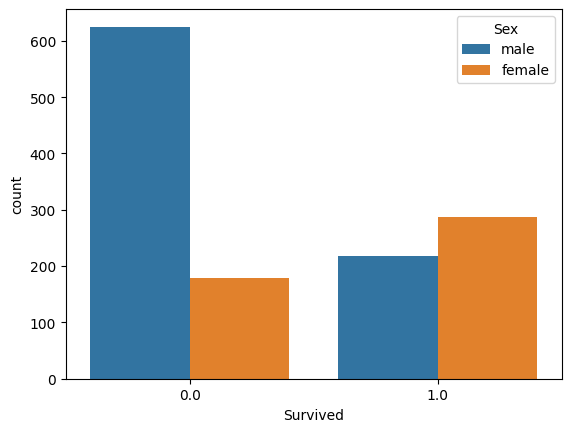

In [22]:
sns.countplot(x='Survived', hue='Sex',  data=df)

In [23]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [24]:
columns_dict['Pclass']

'Bilet sınıfı. 1, 2 veya 3 olarak kodlanmıştır; 1 birinci sınıfı, 2 ikinci sınıfı ve 3 üçüncü sınıfı temsil eder.'

<Axes: xlabel='Survived', ylabel='count'>

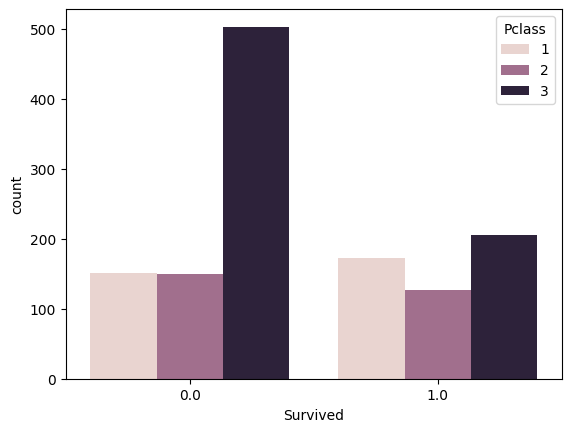

In [25]:
sns.countplot(x='Survived', hue='Pclass',  data=df)

In [26]:
df['Survived'].groupby(df['Pclass']).value_counts(normalize=True)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

In [27]:
df['Survived'].groupby(df['Pclass']).value_counts(normalize=True)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

In [28]:
##sınıfları göre kurtulan kadınlar
df[df['Sex'] == 'female']['Survived'].groupby(df[df['Sex'] == 'female']['Pclass']).value_counts()


Pclass  Survived
1       1.0         91
        0.0          3
2       1.0         70
        0.0          6
3       0.0         72
        1.0         72
Name: count, dtype: int64

In [29]:
#sınıfları göre kurtulan erkekler
df[df['Sex'] == 'male']['Survived'].groupby(df[df['Sex'] == 'male']['Pclass']).value_counts()


Pclass  Survived
1       0.0          77
        1.0          45
2       0.0          91
        1.0          17
3       0.0         300
        1.0          47
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

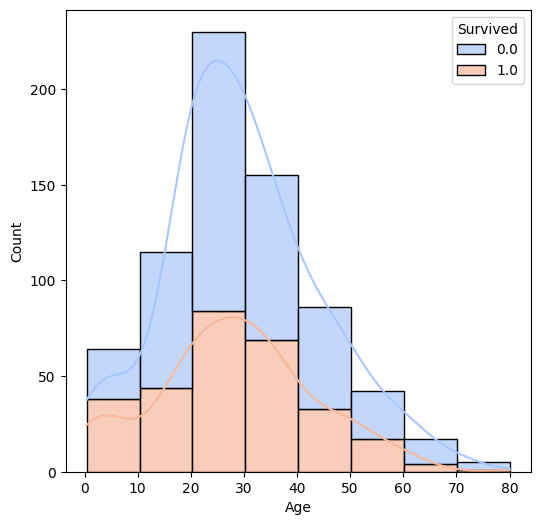

In [30]:
plt.figure(figsize=(6, 6))
df4 = df.reset_index(drop=True)
sns.histplot(data=df4, x='Age', hue='Survived', multiple='stack', 
             kde=True, palette='coolwarm', bins= 8, alpha=.7)

In [31]:
df[df['Age']>=75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.00,A23,S
96,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S


In [32]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='Survived', ylabel='count'>

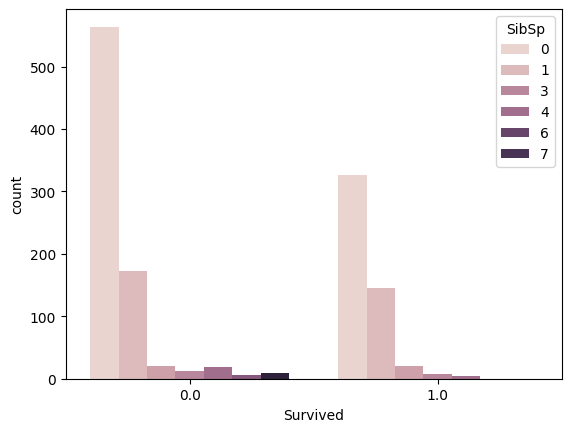

In [33]:
sns.countplot(x='Survived', hue='SibSp',  data=df)

In [34]:
df['Survived'].groupby(df['SibSp']).value_counts(normalize=True)

SibSp  Survived
0      0.0         0.654605
       1.0         0.345395
1      1.0         0.535885
       0.0         0.464115
2      0.0         0.535714
       1.0         0.464286
3      0.0         0.750000
       1.0         0.250000
4      0.0         0.833333
       1.0         0.166667
5      0.0         1.000000
8      0.0         1.000000
Name: proportion, dtype: float64

In [35]:
df['Survived'].groupby(df['SibSp']).value_counts()

SibSp  Survived
0      0.0         398
       1.0         210
1      1.0         112
       0.0          97
2      0.0          15
       1.0          13
3      0.0          12
       1.0           4
4      0.0          15
       1.0           3
5      0.0           5
8      0.0           7
Name: count, dtype: int64

In [36]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [37]:
df['Survived'].groupby(df['Parch']).value_counts(normalize=True)

Parch  Survived
0      0.0         0.656342
       1.0         0.343658
1      1.0         0.550847
       0.0         0.449153
2      0.0         0.500000
       1.0         0.500000
3      1.0         0.600000
       0.0         0.400000
4      0.0         1.000000
5      0.0         0.800000
       1.0         0.200000
6      0.0         1.000000
Name: proportion, dtype: float64

In [38]:
df['Survived'].groupby(df['Parch']).value_counts()

Parch  Survived
0      0.0         445
       1.0         233
1      1.0          65
       0.0          53
2      0.0          40
       1.0          40
3      1.0           3
       0.0           2
4      0.0           4
5      0.0           4
       1.0           1
6      0.0           1
Name: count, dtype: int64

In [39]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [40]:
df['Survived'].groupby(df['Embarked']).value_counts(normalize=True)

Embarked  Survived
C         1.0         0.553571
          0.0         0.446429
Q         0.0         0.610390
          1.0         0.389610
S         0.0         0.663043
          1.0         0.336957
Name: proportion, dtype: float64

In [41]:
df['Survived'].groupby(df['Embarked']).value_counts()

Embarked  Survived
C         1.0          93
          0.0          75
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         217
Name: count, dtype: int64

In [42]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [43]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [44]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [45]:
df['Age'].groupby(df['Title']).mean()

Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [46]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [47]:
aa = df.groupby(['Parch', 'Pclass'])['Survived'].value_counts(normalize=True)
aa

Parch  Pclass  Survived
0      1       1.0         0.607362
               0.0         0.392638
       2       0.0         0.641791
               1.0         0.358209
       3       0.0         0.774278
               1.0         0.225722
1      1       1.0         0.677419
               0.0         0.322581
       2       1.0         0.750000
               0.0         0.250000
       3       0.0         0.636364
               1.0         0.363636
2      1       1.0         0.761905
               0.0         0.238095
       2       1.0         0.812500
               0.0         0.187500
       3       0.0         0.744186
               1.0         0.255814
3      2       1.0         1.000000
       3       0.0         0.666667
               1.0         0.333333
4      1       0.0         1.000000
       3       0.0         1.000000
5      3       0.0         0.800000
               1.0         0.200000
6      3       0.0         1.000000
Name: proportion, dtype: float64

In [48]:
df['Age'].isnull().sum()

0

<Axes: >

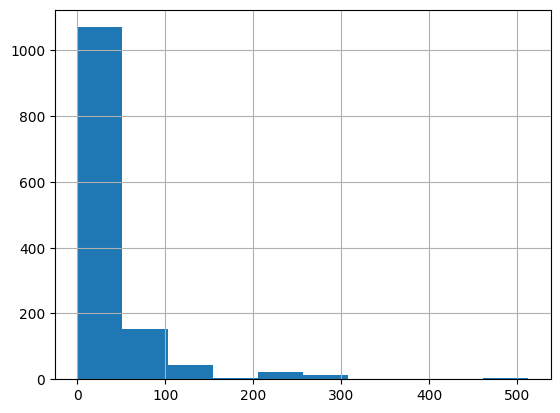

In [49]:
df['Fare'].hist()

In [50]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [51]:
df[df.Fare>=512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [52]:
df.Fare.median()

14.4542

In [53]:
df[df.Fare>=512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [54]:
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

In [55]:
df.Fare.isnull().sum()

0

In [56]:
df['Embarked'].fillna('S', inplace=True)
df.Embarked.isnull().sum()

0

In [57]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [59]:
y = df['Survived']
x = df.drop(['Survived','PassengerId','Name','Ticket', 'Cabin'], axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Title     1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [61]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [62]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
dtype: int64

In [63]:
df_train.shape

(891, 12)

In [64]:
x_train= x[:891]
x_test= x[891:]
y_train= y[:891]
y_test= y[891:]

In [65]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,True,False,False,True


#### Model oluşturma

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [211]:
def model_classification(x,y):
    '''
    x: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [212]:
model_classification(x_train, y_train)

Model:  GaussianNB()
Model Accuracy:  0.8246268656716418
Model Confusion Matrix:  [[144  29]
 [ 18  77]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       173
         1.0       0.73      0.81      0.77        95

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.82      0.83       268

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.832089552238806
Model Confusion Matrix:  [[148  31]
 [ 14  75]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       179
         1.0       0.71      0.84      0.77        89

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.85      0.83      0.84       268

---------------------

c:\Users\ahmi_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  RandomForestClassifier()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[143  36]
 [ 19  70]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.88      0.80      0.84       179
         1.0       0.66      0.79      0.72        89

    accuracy                           0.79       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.81      0.79      0.80       268

--------------------------------------------------
Model:  GradientBoostingClassifier()
Model Accuracy:  0.8246268656716418
Model Confusion Matrix:  [[149  34]
 [ 13  72]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       183
         1.0       0.68      0.85      0.75        85

    accuracy                           0.82       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.84      0.82      0.83     

(LogisticRegression(),
 0.8395522388059702,
 array([[127,  46],
        [ 35,  60]], dtype=int64))

In [213]:
bl = GaussianNB()
bl.fit(x_train, y_train)
y_pred = bl.predict(x_test)
y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [214]:
submission = pd.DataFrame({
    'PassengerId':df_test['PassengerId'],
    'Survived':y_pred.astype(int)
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [215]:
submission.to_csv("submission_gnb.csv",index=False)